# Building a Recurrent Neural Network

In this exercice, you will implement a Recurrent Neural Network in numpy.

Recurrent Neural Networks (RNN) are very effective for Natural Language Processing and other sequence tasks because they have "memory". They can read inputs $x^{\langle t \rangle}$ (such as words) one at a time, and remember some information/context through the hidden layer activations that get passed from one time-step to the next.

**Notation**:
- Superscript $[l]$ denotes an object associated with the $l^{th}$ layer. 
    - Example: $a^{[4]}$ is the $4^{th}$ layer activation. $W^{[5]}$ and $b^{[5]}$ are the $5^{th}$ layer parameters.

- Superscript $(i)$ denotes an object associated with the $i^{th}$ example. 
    - Example: $x^{(i)}$ is the $i^{th}$ training example input.

- Superscript $\langle t \rangle$ denotes an object at the $t^{th}$ time-step. 
    - Example: $x^{\langle t \rangle}$ is the input x at the $t^{th}$ time-step. $x^{(i)\langle t \rangle}$ is the input at the $t^{th}$ timestep of example $i$.
    
- Lowerscript $i$ denotes the $i^{th}$ entry of a vector.
    - Example: $a^{[l]}_i$ denotes the $i^{th}$ entry of the activations in layer $l$.

In [ ]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

import os
os.chdir('/content/drive/My Drive/SYM_TD_TPs/Music Generation/P1 Building a RNN')

!pwd
!ls

In [2]:
import numpy as np
from rnn_utils import *
from IPython.display import Image

## 1 - Forward propagation for the basic RNN

Later in this exercice, you will generate music using an RNN. The basic RNN that you will implement has the structure below.

<img src="images/RNN.png" style="width:500;height:300px;">
<caption><center> **Figure 1**: Basic RNN model </center></caption>

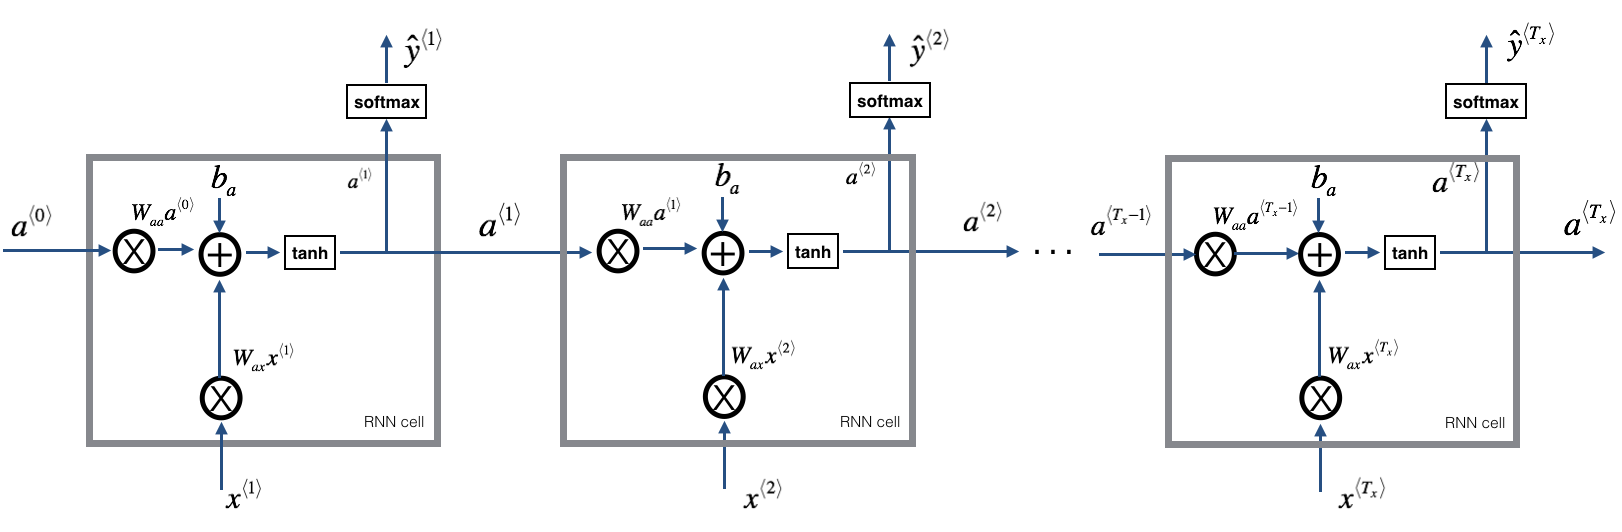

In [10]:
Image("images/RNN.png",width=900,height=600)

**Steps**:
1. Implement the calculations needed for one time-step of the RNN.
2. Implement a loop over $T_x$ time-steps in order to process all the inputs, one at a time. 


## 1.1 - RNN cell

A Recurrent neural network can be seen as the repetition of a single cell. You are first going to implement the computations for a single time-step. The following figure describes the operations for a single time-step of an RNN cell. 

<img src="images/rnn_step_forward.png" style="width:700px;height:300px;">
<caption><center> **Figure 2**: Basic RNN cell. Takes as input $x^{\langle t \rangle}$ (current input) and $a^{\langle t - 1\rangle}$ (previous hidden state containing information from the past), and outputs $a^{\langle t \rangle}$ which is given to the next RNN cell and also used to predict $y^{\langle t \rangle}$ </center></caption>

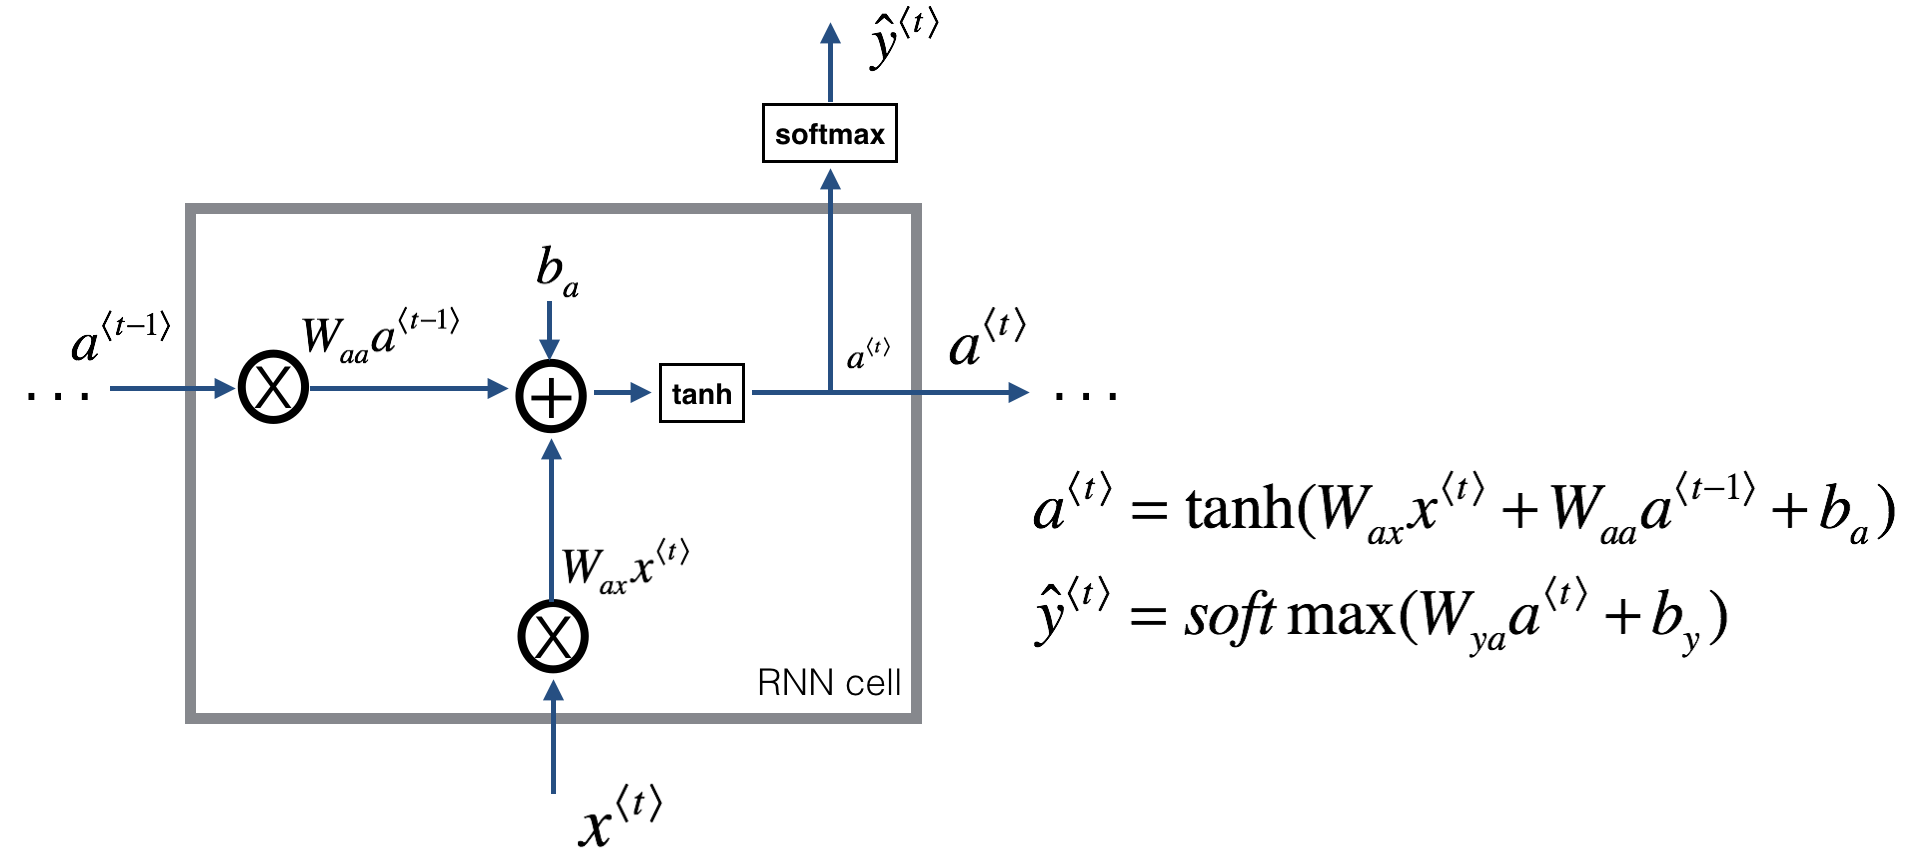

In [9]:
Image("images/rnn_step_forward.png",width=700,height=500)

**Exercise**: Implement the RNN-cell described in Figure (2).

**Instructions**:
1. Compute the hidden state: $a^{\langle t \rangle} = \tanh(W_{aa} a^{\langle t-1 \rangle} + W_{ax} x^{\langle t \rangle} + b_a)$.
2. Using your new hidden state $a^{\langle t \rangle}$, compute the prediction $\hat{y}^{\langle t \rangle} = softmax(W_{ya} a^{\langle t \rangle} + b_y)$. We provided you a function: `softmax`.
3. Store $(a^{\langle t \rangle}, a^{\langle t-1 \rangle}, x^{\langle t \rangle}, parameters)$ in cache
4. Return $a^{\langle t \rangle}$ , $y^{\langle t \rangle}$ and cache

We will vectorize over $m$ examples. Thus, $x^{\langle t \rangle}$ will have dimension $(n_x,m)$, and $a^{\langle t \rangle}$ will have dimension $(n_a,m)$.

**Please pay attention at the number of parameters**

In [71]:
# GRADED FUNCTION: rnn_cell_forward

def rnn_cell_forward(xt, a_prev, parameters):
    """
    Implements a single forward step of the RNN-cell as described in Figure (2)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias, numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, a_prev, xt, parameters)
    """
    
    # Retrieve parameters from "parameters"
    Wax = parameters["Wax"]
    Waa = parameters["Waa"]
    Wya = parameters["Wya"]
    ba = parameters["ba"]
    by = parameters["by"]
    
    ### START CODE HERE ### (≈2 lines)
    # compute next activation state using the formula given above
    ...
    # compute output of the current cell using the formula given above
    ...
    ### END CODE HERE ###
    
    # store values you need for backward propagation in cache
    cache = (a_next, a_prev, xt, parameters)
    
    return a_next, yt_pred, cache

In [72]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a_next, yt_pred, cache = rnn_cell_forward(xt, a_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", a_next.shape)
print("yt_pred[1] =", yt_pred[1])
print("yt_pred.shape = ", yt_pred.shape)

a_next[4] =  [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
a_next.shape =  (5, 10)
yt_pred[1] = [0.9888161  0.01682021 0.21140899 0.36817467 0.98988387 0.88945212
 0.36920224 0.9966312  0.9982559  0.17746526]
yt_pred.shape =  (2, 10)


**Expected Output**: 

<table>
    <tr>
        <td>
            **a_next[4]**:
        </td>
        <td>
           [ 0.59584544  0.18141802  0.61311866  0.99808218  0.85016201  0.99980978
 -0.18887155  0.99815551  0.6531151   0.82872037]
        </td>
    </tr>
        <tr>
        <td>
            **a_next.shape**:
        </td>
        <td>
           (5, 10)
        </td>
    </tr>
        <tr>
        <td>
            **yt[1]**:
        </td>
        <td>
           [ 0.9888161   0.01682021  0.21140899  0.36817467  0.98988387  0.88945212
  0.36920224  0.9966312   0.9982559   0.17746526]
        </td>
    </tr>
        <tr>
        <td>
            **yt.shape**:
        </td>
        <td>
           (2, 10)
        </td>
    </tr>

</table>

## 1.2 - RNN forward pass 

RNN is the repetition of the cell you've just built. If your input sequence of data is carried over 10 time steps, then you will copy the RNN cell 10 times. Each cell takes as input the hidden state from the previous cell ($a^{\langle t-1 \rangle}$) and the current time-step's input data ($x^{\langle t \rangle}$). It outputs a hidden state ($a^{\langle t \rangle}$) and a prediction ($y^{\langle t \rangle}$) for this time-step.


<img src="images/rnn.png" style="width:800px;height:300px;">
<caption><center> **Figure 3**: Basic RNN. The input sequence $x = (x^{\langle 1 \rangle}, x^{\langle 2 \rangle}, ..., x^{\langle T_x \rangle})$  is carried over $T_x$ time steps. The network outputs $y = (y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, ..., y^{\langle T_x \rangle})$. </center></caption>


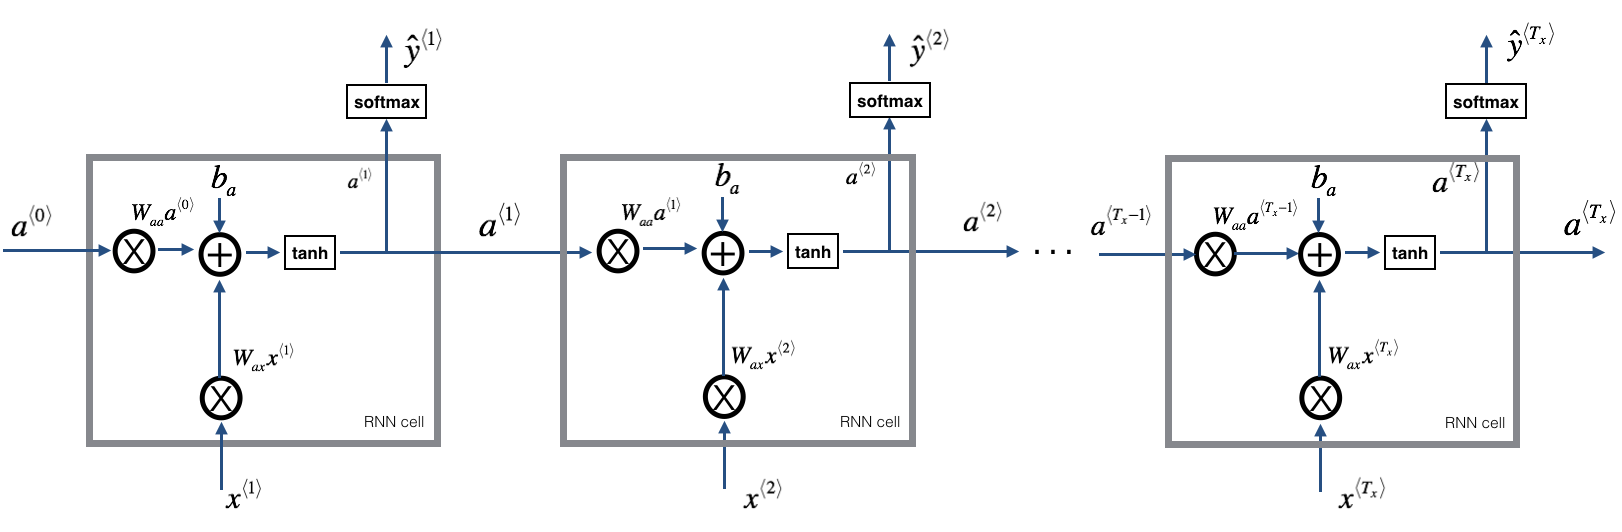

In [5]:
Image("images/rnn.png",width=700,height=500)

**Figure 3**: Basic RNN. The input sequence $x = (x^{\langle 1 \rangle}, x^{\langle 2 \rangle}, ..., x^{\langle T_x \rangle})$  is carried over $T_x$ time steps. The network outputs $y = (y^{\langle 1 \rangle}, y^{\langle 2 \rangle}, ..., y^{\langle T_x \rangle})$.

**Exercise**: Code the forward propagation of the RNN described in Figure (3).

**Instructions**:
1. Create a vector of zeros ($a$) that will store all the hidden states computed by the RNN.
2. Initialize the "next" hidden state as $a_0$ (initial hidden state).
3. Start looping over each time step with incremental index $t$:
    - Update the "next" hidden state and the cache by running `rnn_cell_forward`
    - Store the "next" hidden state in $a$ ($t^{th}$ position) 
    - Store the prediction in y
    - Add the cache to the list of caches
4. Return $a$, $y$ and caches

In [73]:
# GRADED FUNCTION: rnn_forward

def rnn_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Waa -- Weight matrix multiplying the hidden state, numpy array of shape (n_a, n_a)
                        Wax -- Weight matrix multiplying the input, numpy array of shape (n_a, n_x)
                        Wya -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        ba --  Bias numpy array of shape (n_a, 1)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)

    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y_pred -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of caches, x)
    """
    
    # Initialize "caches" which will contain the list of all caches
    caches = []
    
    # Retrieve dimensions from shapes of x and parameters["Wya"]
    n_x, m, T_x = x.shape
    n_y, n_a = parameters["Wya"].shape
    
    ### START CODE HERE ###
    
    # initialize "a" and "y" with zeros (≈2 lines)
    ...
    ...
    
    # Initialize a_next (≈1 line)
    ...
    
    # loop over all time-steps
    for t in range(0,T_x):
        # Update next hidden state, compute the prediction, get the cache (≈1 line)
        a_next, yt_pred, cache = ...
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = ...
        # Save the value of the prediction in y (≈1 line)
        y_pred[:,:,t] = ...
        # Append "cache" to "caches" (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)
    
    return a, y_pred, caches

In [79]:
np.random.seed(1)
x = np.random.randn(3,10,4)
a0 = np.random.randn(5,10)
Waa = np.random.randn(5,5)
Wax = np.random.randn(5,3)
Wya = np.random.randn(2,5)
ba = np.random.randn(5,1)
by = np.random.randn(2,1)
parameters = {"Waa": Waa, "Wax": Wax, "Wya": Wya, "ba": ba, "by": by}

a, y_pred, caches = rnn_forward(x, a0, parameters)
print("a[4][1] = ", a[4][1])
print("a.shape = ", a.shape)
print("y_pred[1][3] =", y_pred[1][3])
print("y_pred.shape = ", y_pred.shape)
print("caches[1][1][3] =", caches[1][1][3])
print("len(caches) = ", len(caches))

a[4][1] =  [-0.99999375  0.77911235 -0.99861469 -0.99833267]
a.shape =  (5, 10, 4)
y_pred[1][3] = [0.79560373 0.86224861 0.11118257 0.81515947]
y_pred.shape =  (2, 10, 4)
caches[1][1][3] = [-1.1425182  -0.34934272 -0.20889423  0.58662319]
len(caches) =  2


**Expected Output**:

<table>
    <tr>
        <td>
            **a[4][1]**:
        </td>
        <td>
           [-0.99999375  0.77911235 -0.99861469 -0.99833267]
        </td>
    </tr>
        <tr>
        <td>
            **a.shape**:
        </td>
        <td>
           (5, 10, 4)
        </td>
    </tr>
        <tr>
        <td>
            **y[1][3]**:
        </td>
        <td>
           [ 0.79560373  0.86224861  0.11118257  0.81515947]
        </td>
    </tr>
        <tr>
        <td>
            **y.shape**:
        </td>
        <td>
           (2, 10, 4)
        </td>
    </tr>
        <tr>
        <td>
            **cache[1][1][3]**:
        </td>
        <td>
           [-1.1425182  -0.34934272 -0.20889423  0.58662319]
        </td>
    </tr>
        <tr>
        <td>
            **len(cache)**:
        </td>
        <td>
           2
        </td>
    </tr>

</table>

You've successfully built the forward propagation of a RNN from scratch. This will work well enough for some applications, but it suffers from vanishing gradient problems. It works best when each output $y^{\langle t \rangle}$ can be estimated using mainly "local" context (meaning information from inputs $x^{\langle t' \rangle}$ where $t'$ is not too far from $t$). 

In the next part, you will build a more complex LSTM model, which is better at addressing vanishing gradients. 

## 2 - Long Short-Term Memory (LSTM) network

The operations of an LSTM-cell.

<img src="images/LSTM.png" style="width:500;height:400px;">
<caption><center> **Figure 4**: LSTM-cell. This tracks and updates a "cell state" or memory variable $c^{\langle t \rangle}$ at every time-step, which can be different from $a^{\langle t \rangle}$. </center></caption>

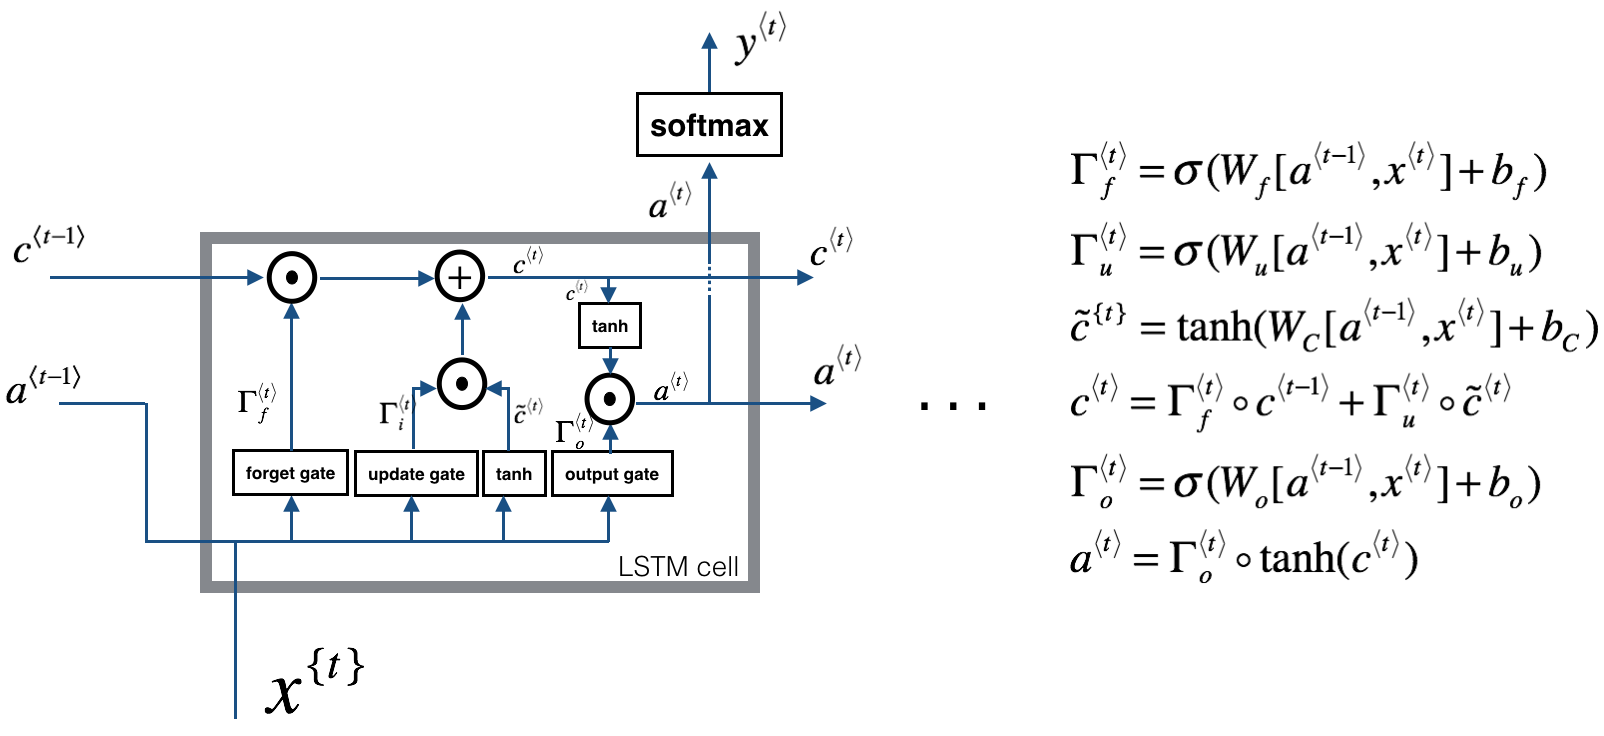

In [6]:
Image("images/LSTM.png",width=700,height=500)

 **Figure 4**: LSTM-cell. This tracks and updates a "cell state" or memory variable $c^{\langle t \rangle}$ at every time-step, which can be different from $a^{\langle t \rangle}$.

You will implement the LSTM cell for a single time-step. Then you can iteratively call it from inside a for-loop to have it process an input with $T_x$ time-steps. 

### About the gates

#### - Forget gate

Lets assume we are reading words in a piece of text. If the subject changes from a singular word to a plural word, we need to find a way to get rid of our previously stored memory value of the singular/plural state. In an LSTM, the forget gate lets us do this: 

$$\Gamma_f^{\langle t \rangle} = \sigma(W_f[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_f)\tag{1} $$

$W_f$ are weights of the forget gate's behavior. The equation above results in a vector $\Gamma_f^{\langle t \rangle}$ with values between 0 and 1. This forget gate vector will be multiplied element-wise by the previous cell state $c^{\langle t-1 \rangle}$. If one of the values of $\Gamma_f^{\langle t \rangle}$ is 0 (or close to 0) then it means that the LSTM should remove that piece of information in the corresponding component of $c^{\langle t-1 \rangle}$. If one of the values is 1, then it will keep the information. 

#### - Update gate

Once we forget that the subject being discussed is singular, we need to find a way to update it to reflect that the new subject is now plural: 

$$\Gamma_u^{\langle t \rangle} = \sigma(W_u[a^{\langle t-1 \rangle}, x^{\{t\}}] + b_u)\tag{2} $$ 

Similar to the forget gate, here $\Gamma_u^{\langle t \rangle}$ is again a vector of values between 0 and 1. This will be multiplied element-wise with $\tilde{c}^{\langle t \rangle}$, in order to compute $c^{\langle t \rangle}$.

#### - Updating the cell 

To update the new subject we need to create a new vector of numbers that we can add to our previous cell state. The equation we use is: 

$$ \tilde{c}^{\langle t \rangle} = \tanh(W_c[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_c)\tag{3} $$

Finally, the new cell state is: 

$$ c^{\langle t \rangle} = \Gamma_f^{\langle t \rangle}* c^{\langle t-1 \rangle} + \Gamma_u^{\langle t \rangle} *\tilde{c}^{\langle t \rangle} \tag{4} $$


#### - Output gate

To decide which outputs we will use, we will use the following two formulas: 

$$ \Gamma_o^{\langle t \rangle}=  \sigma(W_o[a^{\langle t-1 \rangle}, x^{\langle t \rangle}] + b_o)\tag{5}$$ 
$$ a^{\langle t \rangle} = \Gamma_o^{\langle t \rangle}* \tanh(c^{\langle t \rangle})\tag{6} $$

Where in equation 5 you decide what to output using a sigmoid function and in equation 6 you multiply that by the $\tanh$ of the previous state. 

### 2.1 - LSTM cell

**Exercise**: Implement the LSTM cell described in the Figure (4).

**Instructions**:
1. Concatenate $a^{\langle t-1 \rangle}$ and $x^{\langle t \rangle}$ in a single matrix: $concat = \begin{bmatrix} a^{\langle t-1 \rangle} \\ x^{\langle t \rangle} \end{bmatrix}$
2. Compute all the formulas 1-6. You can use `sigmoid()` (provided) and `np.tanh()`.
3. Compute the prediction $y^{\langle t \rangle}$. You can use `softmax()` (provided).

In [75]:
# GRADED FUNCTION: lstm_cell_forward

def lstm_cell_forward(xt, a_prev, c_prev, parameters):
    """
    Implement a single forward step of the LSTM-cell as described in Figure (4)

    Arguments:
    xt -- your input data at timestep "t", numpy array of shape (n_x, m).
    a_prev -- Hidden state at timestep "t-1", numpy array of shape (n_a, m)
    c_prev -- Memory state at timestep "t-1", numpy array of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc --  Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo --  Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a_next -- next hidden state, of shape (n_a, m)
    c_next -- next memory state, of shape (n_a, m)
    yt_pred -- prediction at timestep "t", numpy array of shape (n_y, m)
    cache -- tuple of values needed for the backward pass, contains (a_next, c_next, a_prev, c_prev, xt, parameters)
    
    Note: ft/it/ot stand for the forget/update/output gates, cct stands for the candidate value (c tilde),
          c stands for the memory value
    """

    # Retrieve parameters from "parameters"
    Wf = parameters["Wf"]
    bf = parameters["bf"]
    Wi = parameters["Wi"]
    bi = parameters["bi"]
    Wc = parameters["Wc"]
    bc = parameters["bc"]
    Wo = parameters["Wo"]
    bo = parameters["bo"]
    Wy = parameters["Wy"]
    by = parameters["by"]
    
    # Retrieve dimensions from shapes of xt and Wy
    n_x, m = xt.shape
    n_y, n_a = Wy.shape

    ### START CODE HERE ###
    # Concatenate a_prev and xt (≈3 lines)
    concat = ...
    concat[: n_a, :] = ...
    concat[n_a :, :] = ...

    # Compute values for ft, it, cct, c_next, ot, a_next using the formulas given figure (4) (≈6 lines)
    ft = ...
    it = ...
    cct = ...
    c_next = ...
    ot = ...
    a_next = ...
    
    # Compute prediction of the LSTM cell (≈1 line)
    yt_pred = softmax(np.dot(Wy,a_next) + by)
    ### END CODE HERE ###

    # store values needed for backward propagation in cache
    cache = (a_next, c_next, a_prev, c_prev, ft, it, cct, ot, xt, parameters)

    return a_next, c_next, yt_pred, cache

In [76]:
np.random.seed(1)
xt = np.random.randn(3,10)
a_prev = np.random.randn(5,10)
c_prev = np.random.randn(5,10)
Wf = np.random.randn(5, 5+3)
bf = np.random.randn(5,1)
Wi = np.random.randn(5, 5+3)
bi = np.random.randn(5,1)
Wo = np.random.randn(5, 5+3)
bo = np.random.randn(5,1)
Wc = np.random.randn(5, 5+3)
bc = np.random.randn(5,1)
Wy = np.random.randn(2,5)
by = np.random.randn(2,1)

parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}

a_next, c_next, yt, cache = lstm_cell_forward(xt, a_prev, c_prev, parameters)
print("a_next[4] = ", a_next[4])
print("a_next.shape = ", c_next.shape)
print("c_next[2] = ", c_next[2])
print("c_next.shape = ", c_next.shape)
print("yt[1] =", yt[1])
print("yt.shape = ", yt.shape)
print("cache[1][3] =", cache[1][3])
print("len(cache) = ", len(cache))

a_next[4] =  [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
a_next.shape =  (5, 10)
c_next[2] =  [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
c_next.shape =  (5, 10)
yt[1] = [0.79913913 0.15986619 0.22412122 0.15606108 0.97057211 0.31146381
 0.00943007 0.12666353 0.39380172 0.07828381]
yt.shape =  (2, 10)
cache[1][3] = [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
len(cache) =  10


**Expected Output**:

<table>
    <tr>
        <td>
            **a_next[4]**:
        </td>
        <td>
           [-0.66408471  0.0036921   0.02088357  0.22834167 -0.85575339  0.00138482
  0.76566531  0.34631421 -0.00215674  0.43827275]
        </td>
    </tr>
        <tr>
        <td>
            **a_next.shape**:
        </td>
        <td>
           (5, 10)
        </td>
    </tr>
        <tr>
        <td>
            **c_next[2]**:
        </td>
        <td>
           [ 0.63267805  1.00570849  0.35504474  0.20690913 -1.64566718  0.11832942
  0.76449811 -0.0981561  -0.74348425 -0.26810932]
        </td>
    </tr>
        <tr>
        <td>
            **c_next.shape**:
        </td>
        <td>
           (5, 10)
        </td>
    </tr>
        <tr>
        <td>
            **yt[1]**:
        </td>
        <td>
           [ 0.79913913  0.15986619  0.22412122  0.15606108  0.97057211  0.31146381
  0.00943007  0.12666353  0.39380172  0.07828381]
        </td>
    </tr>
        <tr>
        <td>
            **yt.shape**:
        </td>
        <td>
           (2, 10)
        </td>
    </tr>
    <tr>
        <td>
            **cache[1][3]**:
        </td>
        <td>
           [-0.16263996  1.03729328  0.72938082 -0.54101719  0.02752074 -0.30821874
  0.07651101 -1.03752894  1.41219977 -0.37647422]
        </td>
    </tr>
        <tr>
        <td>
            **len(cache)**:
        </td>
        <td>
           10
        </td>
    </tr>

</table>

### 2.2 - Forward pass for LSTM

Now that you have implemented one step of an LSTM, you can now iterate this over this using a for-loop to process a sequence of $T_x$ inputs. 

<img src="images/LSTM_rnn.png" style="width:500;height:300px;">
<caption><center> **Figure 5**: LSTM over multiple time-steps. </center></caption>

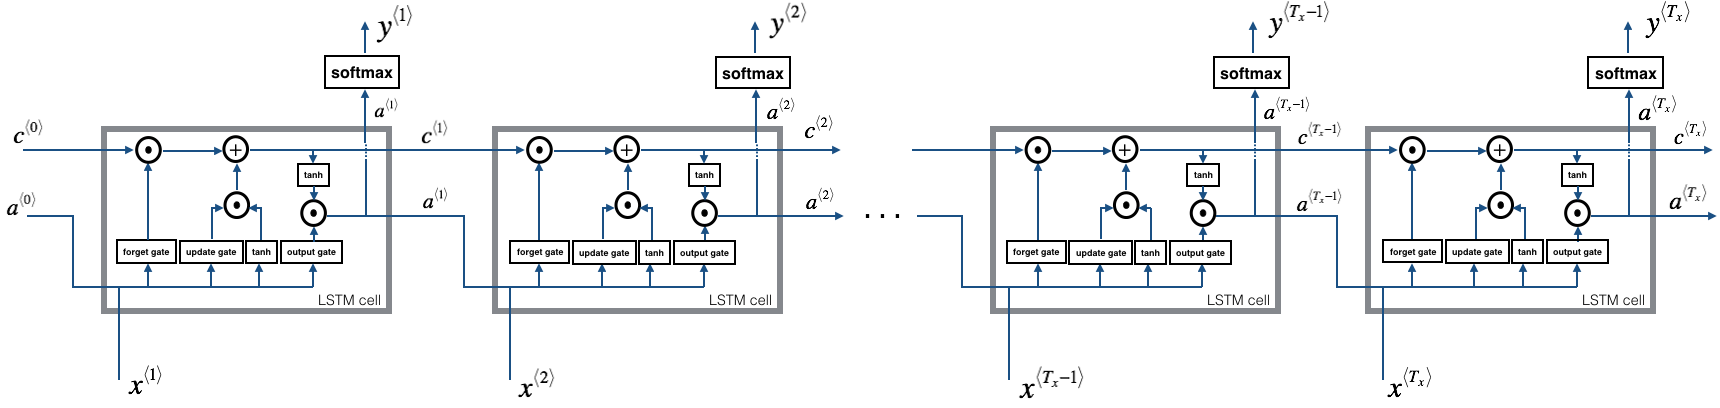

In [8]:
Image("images/LSTM_rnn.png",width=800,height=600)

**Exercise:** Implement `lstm_forward()` to run an LSTM over $T_x$ time-steps. 

**Note**: $c^{\langle 0 \rangle}$ is initialized with zeros.

In [77]:
# GRADED FUNCTION: lstm_forward

def lstm_forward(x, a0, parameters):
    """
    Implement the forward propagation of the recurrent neural network using an LSTM-cell described in Figure (3).

    Arguments:
    x -- Input data for every time-step, of shape (n_x, m, T_x).
    a0 -- Initial hidden state, of shape (n_a, m)
    parameters -- python dictionary containing:
                        Wf -- Weight matrix of the forget gate, numpy array of shape (n_a, n_a + n_x)
                        bf -- Bias of the forget gate, numpy array of shape (n_a, 1)
                        Wi -- Weight matrix of the update gate, numpy array of shape (n_a, n_a + n_x)
                        bi -- Bias of the update gate, numpy array of shape (n_a, 1)
                        Wc -- Weight matrix of the first "tanh", numpy array of shape (n_a, n_a + n_x)
                        bc -- Bias of the first "tanh", numpy array of shape (n_a, 1)
                        Wo -- Weight matrix of the output gate, numpy array of shape (n_a, n_a + n_x)
                        bo -- Bias of the output gate, numpy array of shape (n_a, 1)
                        Wy -- Weight matrix relating the hidden-state to the output, numpy array of shape (n_y, n_a)
                        by -- Bias relating the hidden-state to the output, numpy array of shape (n_y, 1)
                        
    Returns:
    a -- Hidden states for every time-step, numpy array of shape (n_a, m, T_x)
    y -- Predictions for every time-step, numpy array of shape (n_y, m, T_x)
    caches -- tuple of values needed for the backward pass, contains (list of all the caches, x)
    """

    # Initialize "caches", which will track the list of all the caches
    caches = []
    
    ### START CODE HERE ###
    # Retrieve dimensions from shapes of x and parameters['Wy'] (≈2 lines)
    n_x, m, T_x = x.shape
    n_y, n_a = parameters['Wy'].shape
    
    # initialize "a", "c" and "y" with zeros (≈3 lines)
    a = ...
    c = ...
    y = ...
    
    # Initialize a_next (a0) and c_next (≈2 lines)
    a_next = ...
    c_next = ...
    
    # loop over all time-steps
    for t in range(T_x):
        # Update next hidden state, next memory state, compute the prediction, get the cache (≈1 line)
        a_next, c_next, yt, cache = ...
        # Save the value of the new "next" hidden state in a (≈1 line)
        a[:,:,t] = ...
        # Save the value of the prediction in y (≈1 line)
        y[:,:,t] = ...
        # Save the value of the next cell state (≈1 line)
        c[:,:,t]  = ...
        # Append the cache into caches (≈1 line)
        caches.append(cache)
        
    ### END CODE HERE ###
    
    # store values needed for backward propagation in cache
    caches = (caches, x)

    return a, y, c, caches

In [78]:
np.random.seed(1)
x = np.random.randn(3,10,7)
a0 = np.random.randn(5,10)
Wf = np.random.randn(5, 5+3)
bf = np.random.randn(5,1)
Wi = np.random.randn(5, 5+3)
bi = np.random.randn(5,1)
Wo = np.random.randn(5, 5+3)
bo = np.random.randn(5,1)
Wc = np.random.randn(5, 5+3)
bc = np.random.randn(5,1)
Wy = np.random.randn(2,5)
by = np.random.randn(2,1)

parameters = {"Wf": Wf, "Wi": Wi, "Wo": Wo, "Wc": Wc, "Wy": Wy, "bf": bf, "bi": bi, "bo": bo, "bc": bc, "by": by}

a, y, c, caches = lstm_forward(x, a0, parameters)
print("a[4][3][6] = ", a[4][3][6])
print("a.shape = ", a.shape)
print("y[1][4][3] =", y[1][4][3])
print("y.shape = ", y.shape)
print("caches[1][1[1]] =", caches[1][1][1])
print("c[1][2][1]", c[1][2][1])
print("len(caches) = ", len(caches))

a[4][3][6] =  0.17211776753291672
a.shape =  (5, 10, 7)
y[1][4][3] = 0.9508734618501101
y.shape =  (2, 10, 7)
caches[1][1[1]] = [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
  0.41005165]
c[1][2][1] -0.8555449167181982
len(caches) =  2


**Expected Output**:

<table>
    <tr>
        <td>
            **a[4][3][6]** =
        </td>
        <td>
           0.172117767533
        </td>
    </tr>
        <tr>
        <td>
            **a.shape** =
        </td>
        <td>
           (5, 10, 7)
        </td>
    </tr>
        <tr>
        <td>
            **y[1][4][3]** =
        </td>
        <td>
           0.95087346185
        </td>
    </tr>
        <tr>
        <td>
            **y.shape** =
        </td>
        <td>
           (2, 10, 7)
        </td>
    </tr>
        <tr>
        <td>
            **caches[1][1][1]** =
        </td>
        <td>
           [ 0.82797464  0.23009474  0.76201118 -0.22232814 -0.20075807  0.18656139
  0.41005165]
        </td>
        
     </tr>
        <tr>
        <td>
            **c[1][2][1]** =
        </td>
        <td>
           -0.855544916718
        </td>
    </tr>       
        
    </tr>
        <tr>
        <td>
            **len(caches)** =
        </td>
        <td>
           2
        </td>
    </tr>

</table>

Congratulations! You have now implemented the forward passes for the basic RNN and the LSTM. When using a deep learning framework, implementing the forward pass is sufficient to build systems that achieve great performance. 


## 3 - Backpropagation in RNNs (OPTIONAL)

In modern deep learning frameworks, you only have to implement the forward pass, and the framework takes care of the backward pass, so most deep learning engineers do not need to bother with the details of the backward pass. If however you are an expert in calculus and want to see the details of backprop in RNNs, you can work through this optional portion of the notebook. 

When in an earlier excercise you implemented a simple (fully connected) neural network, you used backpropagation to compute the derivatives with respect to the cost to update the parameters. Similarly, in recurrent neural networks you can to calculate the derivatives with respect to the cost in order to update the parameters. 